<a href="https://colab.research.google.com/github/shazm12/Movie-Recommendation-System-Using-a-Hybrid-Approach/blob/main/Movie_Recommendation_System_with_a_hybrid_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Project**

## Movie Recommendation System Using Collaborative And Content-Based Filtering With A Hybrid Approach


The problem I have picked for the project is to design and train an efficient movie recommendation model which will recommend movies to users based on the User interaction matrix which would contain the user details with the movies the users liked and vice versa. Also, I will design another model which will recommend movies based on the context, title, genre, and such other attributes of the movies liked by the user and would recommend similar movies to the user.


Base Paper - https://www.ijcaonline.org/research/volume124/number3/kumar-2015-ijca-904111.pdf

# **What is Content Based Filtering?**

Content-Based recommender system tries to guess the features or behavior of a user given the item’s features, he/she reacts positively to.

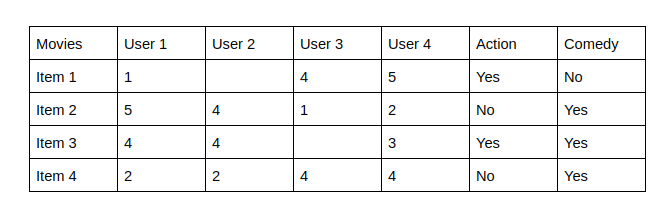



The last two columns Action and Comedy Describe the Genres of the movies. Now, given these genres, we can know which users like which genre, as a result, we can obtain features corresponding to that particular user, depending on how he/she reacts to movies of that genre.
Once, we know the likings of the user we can embed him/her in an embedding space using the feature vector generated and recommend him/her according to his/her choice. During recommendation, the similarity metrics (We will talk about it in a bit) are calculated from the item’s feature vectors and the user’s preferred feature vectors from his/her previous records. Then, the top few are recommended.

# **What is Collaborative Filtering?**


Collaborative does not need the features of the items to be given. Every user and item is described by a feature vector or embedding.
It creates embedding for both users and items on its own. It embeds both users and items in the same embedding space.
It considers other users’ reactions while recommending a particular user. It notes which items a particular user likes and also the items that the users with behavior and likings like him/her likes, to recommend items to that user.
It collects user feedbacks on different items and uses them for recommendations.



# **Type of collaborative Recommender System I am Using**
I am using a Item-Item filtering type. Here, if user A likes an item x, then, the items y and z which are similar to x in property, then y and z are recommended to the user. As a statement, it can be said, “Because you liked this, you may also like those”.

Now, if one user A behaves like other users B, C, and D, then for a product x, A’s rating is given by:

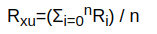


Where R is the rating user u gives to the product x, and it is the average of the ratings u gave to products like x. Here also, we take a weighted average.

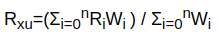






# **Proposed Idea**


I have proposed a hybrid recommender which will be using the trained model from both the mentioned methods and then predict and derive the results for a specific movie and calucate the weighted average from the resultant matrices that we obtain and create a new hybrid matrix and extract the resultant predicted movies that we get from it.


In [ ]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Gathering dataset (IMDB Dataset)**

The Dataset used is a IMDB dataset with over **85855** movies and tv sitcoms and is very comprehensive with demographic-wise rating and metadata like production company and even the income and gross budget of the movie or show.

I have filtered out movies from 2014-Present movies just for the demonstration purposes and have now made a dataset of **3000** movies and shows.

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/IMDb movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/IMDb ratings.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
movies.head(2)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [ ]:
movies.shape

(85855, 22)

In [ ]:
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


# **Removing Null or NA Values From Dataset**

In [ ]:
movies.dropna()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
506,tt0017136,Metropolis,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",In a futuristic city sharply divided between t...,8.3,156076,DEM 6000000,$ 1236166,$ 1349711,98.0,495.0,208.0
1048,tt0021749,Luci della città,City Lights,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...","With the aid of a wealthy erratic tippler, a d...",8.5,162668,$ 1500000,$ 19181,$ 46008,99.0,295.0,122.0
2454,tt0027977,Tempi moderni,Modern Times,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",The Tramp struggles to live in modern industri...,8.5,211250,$ 1500000,$ 163577,$ 457688,96.0,307.0,115.0
2795,tt0029453,Il bandito della Casbah,Pépé le Moko,1937,1937-10-22,"Crime, Drama, Romance",94,France,"French, Arabic",Julien Duvivier,"Henri La Barthe, Henri La Barthe",Paris Film,"Jean Gabin, Gabriel Gabrio, Saturnin Fabre, Fe...",A wanted gangster is both king and prisoner of...,7.7,6180,$ 60000,$ 155895,$ 155895,98.0,46.0,55.0
2827,tt0029583,Biancaneve e i sette nani,Snow White and the Seven Dwarfs,1937,1938-11-30,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,177157,$ 1499000,$ 184925486,$ 184925486,95.0,260.0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85266,tt9208444,Impractical Jokers: The Movie,Impractical Jokers: The Movie,2020,2020-02-28,Comedy,92,USA,English,Chris Henchy,"Chris Henchy, Joe Gatto",Funny or Die,"Paula Abdul, Joe Gatto, James Murray, Brian Qu...",The story of a humiliating high school mishap ...,5.9,4105,$ 3000000,$ 10691091,$ 10691091,39.0,152.0,17.0
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,"Eleanor Catton, Jane Austen",Working Title Films,"Anya Taylor-Joy, Angus Imrie, Letty Thomas, Ge...","In 1800s England, a well meaning but selfish y...",6.7,19858,$ 10000000,$ 10055355,$ 25659965,71.0,314.0,188.0
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore","Jon Lucas, Scott Moore",CBS Films,"Adam Devine, Alexandra Shipp, Rose Byrne, Ron ...",A comedy about what can happen when you love y...,6.1,17038,$ 5000000,$ 6546159,$ 9341824,39.0,234.0,42.0
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,Makoto Shinkai,"""Weathering With You"" Film Partners","Kotaro Daigo, Nana Mori, Shun Oguri, Sei Hirai...",A high-school boy who has run away to Tokyo be...,7.6,16277,$ 11100000,$ 7798743,$ 193176979,72.0,177.0,110.0


In [ ]:
movies.shape

(85855, 22)

In [ ]:
movies['year'] = movies['year'].astype(str)

In [ ]:
# Movies with year greater then 2014
import datetime
movies = movies[movies['year'] > "2017" ]
movies = movies.loc[(movies['language']=='English') | (movies['language']=='Hindi') | (movies['language']=='Japaneese')]

In [ ]:
movies.head(10)



,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
43366,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,2018-05-20,"Drama, Sci-Fi, Thriller",100,USA,English,Ramin Bahrani,"Ray Bradbury, Ramin Bahrani",HBO Films,"Michael B. Jordan, Aaron Davis, Cindy Katz, Mi...","In a terrifying care-free future, a young man,...",4.9,16882,NaN,NaN,NaN,NaN,206.0,74.0
46337,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,2019-12-06,Drama,113,USA,English,Sam Taylor-Johnson,"James Frey, Aaron Taylor-Johnson",Momentum Pictures,"Aaron Taylor-Johnson, Billy Bob Thornton, Odes...",A drug dependent young man faces his past and ...,6.2,1551,NaN,NaN,$ 89825,45.0,36.0,23.0
46892,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,2019-08-08,"Action, Drama, War",118,Australia,English,Kriv Stenders,"Stuart Beattie, James Nicholas",Deeper Water,"Travis Fimmel, Toby Blome, Alexander England, ...","In August 1966, in a Vietnamese rubber plantat...",6.8,8131,AUD 24000000,NaN,$ 2078370,NaN,204.0,31.0
49759,tt0783640,Era mio figlio,The Last Full Measure,2019,2020-04-02,"Drama, War",116,USA,English,Todd Robinson,Todd Robinson,Foresight Unlimited,"Sebastian Stan, Alison Sudol, Asher Miles Fall...","Thirty-four years after his death, Airman Will...",6.7,5449,$ 20000000,$ 2949212,$ 3364426,51.0,163.0,44.0
49964,tt0800325,The Dirt,The Dirt,2019,2019-03-22,"Biography, Comedy, Drama",107,USA,English,Jeff Tremaine,"Rich Wilkes, Amanda Adelson",10th Street Entertainment,"Machine Gun Kelly, Erin Ownbey, Douglas Booth,...",Based on the bestselling autobiography from Mö...,7.0,37295,NaN,NaN,NaN,39.0,553.0,72.0
50158,tt0810836,Dirt Music,Dirt Music,2019,2020-07-17,"Crime, Drama, Romance",105,"Australia, UK",English,Gregor Jordan,"Jack Thorne, Tim Winton",Wildgaze Films,"Kelly Macdonald, Garrett Hedlund, David Wenham...",The stunning landscape of Western Australia is...,5.2,204,NaN,NaN,NaN,35.0,5.0,15.0
50603,tt0837563,Pet Sematary,Pet Sematary,2019,2019-05-09,"Horror, Mystery, Thriller",101,"USA, Canada",English,"Kevin Kölsch, Dennis Widmyer","Stephen King, Matt Greenberg",Paramount Pictures,"Jason Clarke, Amy Seimetz, John Lithgow, Jeté ...","Dr. Louis Creed and his wife, Rachel, relocate...",5.7,76819,$ 21000000,$ 54724696,$ 113118226,57.0,1169.0,326.0
50867,tt0858419,Bolden,Bolden,2019,2019-05-03,Drama,108,USA,English,Dan Pritzker,"Dan Pritzker, Dan Pritzker",King Bolden,"Gary Carr, Erik LaRay Harvey, Ian McShane, Mic...",A mythical account of the life of Buddy Bolden...,5.6,417,NaN,NaN,NaN,50.0,16.0,5.0
50877,tt0859635,Super Troopers 2,Super Troopers 2,2018,2018-07-12,"Comedy, Crime, Mystery",100,USA,English,Jay Chandrasekhar,"Jay Chandrasekhar, Kevin Heffernan",Votiv Films,"Seann William Scott, Clifton Collins Jr., Stev...",When a border dispute arises between the U.S. ...,6.0,23256,$ 13500000,$ 30617396,$ 31626386,41.0,207.0,93.0
51533,tt0926132,Road to Red,Road to Red,2020,2020-01-03,"Action, Adventure, Horror",120,"USA, Portugal",English,Tito da Costa,"Larry Leahy, Tito da Costa",Worldwide Artists,"Sean Gray, Chris Blasman, Renee Dorian, Michae...",A surf-skate action-thriller about five best f...,4.2,472,$ 3000000,NaN,NaN,NaN,8.0,1.0


In [ ]:

movies.shape

(2730, 22)

# **Data Preprocessing**

In [ ]:
movies['genre'] = movies['genre'].str.replace(',',' ')

In [ ]:
#Combined dataset of movies and reviews
movies = movies.merge(ratings,on='imdb_title_id')

In [ ]:
movies.head()
#Attributes we need from dataset -
# imdb_title_id
# title
# year
# genre
# director
# writer
# production_comapny
# actors
# description
# release-date(not sure)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,2018-05-20,Drama Sci-Fi Thriller,100,USA,English,Ramin Bahrani,"Ray Bradbury, Ramin Bahrani",HBO Films,"Michael B. Jordan, Aaron Davis, Cindy Katz, Mi...","In a terrifying care-free future, a young man,...",4.9,16882,NaN,NaN,NaN,NaN,206.0,74.0,4.9,16882,4.9,5.0,482,252,657,1596,3266,4267,2782,1473,867,1240,4.5,23.0,5.0,2602.0,4.8,6453.0,4.9,2750.0,4.9,10441.0,3.8,14.0,4.9,1946.0,4.8,5378.0,4.8,2291.0,5.1,2230.0,5.9,7.0,5.2,599.0,4.9,971.0,5.2,414.0,4.4,234.0,4.9,3187.0,4.8,6693.0
1,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,2019-12-06,Drama,113,USA,English,Sam Taylor-Johnson,"James Frey, Aaron Taylor-Johnson",Momentum Pictures,"Aaron Taylor-Johnson, Billy Bob Thornton, Odes...",A drug dependent young man faces his past and ...,6.2,1551,NaN,NaN,$ 89825,45.0,36.0,23.0,6.2,1551,6.4,6.0,142,64,221,326,380,203,78,30,23,84,6.5,2.0,6.4,187.0,6.1,536.0,6.1,393.0,6.2,835.0,6.5,2.0,6.3,116.0,6.2,386.0,6.1,281.0,6.2,330.0,NaN,NaN,6.6,67.0,6.1,139.0,6.1,102.0,5.2,60.0,6.1,346.0,6.2,618.0
2,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,2019-08-08,Action Drama War,118,Australia,English,Kriv Stenders,"Stuart Beattie, James Nicholas",Deeper Water,"Travis Fimmel, Toby Blome, Alexander England, ...","In August 1966, in a Vietnamese rubber plantat...",6.8,8131,AUD 24000000,NaN,$ 2078370,NaN,204.0,31.0,6.8,8131,7.1,7.0,885,708,1558,2470,1370,582,214,90,69,185,7.6,10.0,6.9,918.0,6.7,2808.0,6.9,1784.0,6.8,5537.0,8.1,7.0,6.9,811.0,6.7,2595.0,6.9,1618.0,7.1,365.0,7.3,3.0,6.9,56.0,7.0,141.0,7.4,129.0,6.1,91.0,6.9,821.0,6.8,3675.0
3,tt0783640,Era mio figlio,The Last Full Measure,2019,2020-04-02,Drama War,116,USA,English,Todd Robinson,Todd Robinson,Foresight Unlimited,"Sebastian Stan, Alison Sudol, Asher Miles Fall...","Thirty-four years after his death, Airman Will...",6.7,5449,$ 20000000,$ 2949212,$ 3364426,51.0,163.0,44.0,6.7,5449,7.1,7.0,802,542,953,1242,961,428,189,101,68,163,7.0,1.0,6.5,471.0,6.5,1674.0,7.0,1494.0,6.6,3335.0,NaN,NaN,6.4,367.0,6.4,1425.0,6.9,1265.0,7.2,571.0,7.0,1.0,6.8,86.0,6.9,222.0,7.5,198.0,5.6,87.0,7.1,1132.0,6.4,1866.0
4,tt0800325,The Dirt,The Dirt,2019,2019-03-22,Biography Comedy Drama,107,USA,English,Jeff Tremaine,"Rich Wilkes, Amanda Adelson",10th Street Entertainment,"Machine Gun Kelly, Erin Ownbey, Douglas Booth,...",Based on the bestselling autobiography from Mö...,7.0,37295,NaN,NaN,NaN,39.0,553.0,72.0,7.0,37295,7.2,7.0,4109,3489,8378,11041,5455,2353,1040,536,345,549,6.9,54.0,7.0,6279.0,6.9,13377.0,7.0,5226.0,6.9,21974.0,6.5,28.0,6.9,4608.0,6.9,10971.0,7.0,4206.0,7.2,4767.0,7.7,9.0,7.2,1315.0,7.1,2033.0,7.3,849.0,6.3,172.0,7.0,5506.0,6.9,13868.0


In [ ]:
len(movies.imdb_title_id.unique())

2730

In [ ]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,2018-05-20,Drama Sci-Fi Thriller,100,USA,English,Ramin Bahrani,"Ray Bradbury, Ramin Bahrani",HBO Films,"Michael B. Jordan, Aaron Davis, Cindy Katz, Mi...","In a terrifying care-free future, a young man,...",4.9,16882,NaN,NaN,NaN,NaN,206.0,74.0,4.9,16882,4.9,5.0,482,252,657,1596,3266,4267,2782,1473,867,1240,4.5,23.0,5.0,2602.0,4.8,6453.0,4.9,2750.0,4.9,10441.0,3.8,14.0,4.9,1946.0,4.8,5378.0,4.8,2291.0,5.1,2230.0,5.9,7.0,5.2,599.0,4.9,971.0,5.2,414.0,4.4,234.0,4.9,3187.0,4.8,6693.0
1,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,2019-12-06,Drama,113,USA,English,Sam Taylor-Johnson,"James Frey, Aaron Taylor-Johnson",Momentum Pictures,"Aaron Taylor-Johnson, Billy Bob Thornton, Odes...",A drug dependent young man faces his past and ...,6.2,1551,NaN,NaN,$ 89825,45.0,36.0,23.0,6.2,1551,6.4,6.0,142,64,221,326,380,203,78,30,23,84,6.5,2.0,6.4,187.0,6.1,536.0,6.1,393.0,6.2,835.0,6.5,2.0,6.3,116.0,6.2,386.0,6.1,281.0,6.2,330.0,NaN,NaN,6.6,67.0,6.1,139.0,6.1,102.0,5.2,60.0,6.1,346.0,6.2,618.0
2,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,2019-08-08,Action Drama War,118,Australia,English,Kriv Stenders,"Stuart Beattie, James Nicholas",Deeper Water,"Travis Fimmel, Toby Blome, Alexander England, ...","In August 1966, in a Vietnamese rubber plantat...",6.8,8131,AUD 24000000,NaN,$ 2078370,NaN,204.0,31.0,6.8,8131,7.1,7.0,885,708,1558,2470,1370,582,214,90,69,185,7.6,10.0,6.9,918.0,6.7,2808.0,6.9,1784.0,6.8,5537.0,8.1,7.0,6.9,811.0,6.7,2595.0,6.9,1618.0,7.1,365.0,7.3,3.0,6.9,56.0,7.0,141.0,7.4,129.0,6.1,91.0,6.9,821.0,6.8,3675.0
3,tt0783640,Era mio figlio,The Last Full Measure,2019,2020-04-02,Drama War,116,USA,English,Todd Robinson,Todd Robinson,Foresight Unlimited,"Sebastian Stan, Alison Sudol, Asher Miles Fall...","Thirty-four years after his death, Airman Will...",6.7,5449,$ 20000000,$ 2949212,$ 3364426,51.0,163.0,44.0,6.7,5449,7.1,7.0,802,542,953,1242,961,428,189,101,68,163,7.0,1.0,6.5,471.0,6.5,1674.0,7.0,1494.0,6.6,3335.0,NaN,NaN,6.4,367.0,6.4,1425.0,6.9,1265.0,7.2,571.0,7.0,1.0,6.8,86.0,6.9,222.0,7.5,198.0,5.6,87.0,7.1,1132.0,6.4,1866.0
4,tt0800325,The Dirt,The Dirt,2019,2019-03-22,Biography Comedy Drama,107,USA,English,Jeff Tremaine,"Rich Wilkes, Amanda Adelson",10th Street Entertainment,"Machine Gun Kelly, Erin Ownbey, Douglas Booth,...",Based on the bestselling autobiography from Mö...,7.0,37295,NaN,NaN,NaN,39.0,553.0,72.0,7.0,37295,7.2,7.0,4109,3489,8378,11041,5455,2353,1040,536,345,549,6.9,54.0,7.0,6279.0,6.9,13377.0,7.0,5226.0,6.9,21974.0,6.5,28.0,6.9,4608.0,6.9,10971.0,7.0,4206.0,7.2,4767.0,7.7,9.0,7.2,1315.0,7.1,2033.0,7.3,849.0,6.3,172.0,7.0,5506.0,6.9,13868.0


In [ ]:
frating = movies[['imdb_title_id','title','allgenders_18age_avg_vote']]

In [ ]:
fmovies = movies[['imdb_title_id','title','original_title','year','genre','description','actors','writer','director']]

In [ ]:
fmovies.shape

(2730, 9)

In [ ]:
fmovies.head()

,imdb_title_id,title,original_title,year,genre,description,actors,writer,director
0,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,Drama Sci-Fi Thriller,"In a terrifying care-free future, a young man,...","Michael B. Jordan, Aaron Davis, Cindy Katz, Mi...","Ray Bradbury, Ramin Bahrani",Ramin Bahrani
1,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,Drama,A drug dependent young man faces his past and ...,"Aaron Taylor-Johnson, Billy Bob Thornton, Odes...","James Frey, Aaron Taylor-Johnson",Sam Taylor-Johnson
2,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,Action Drama War,"In August 1966, in a Vietnamese rubber plantat...","Travis Fimmel, Toby Blome, Alexander England, ...","Stuart Beattie, James Nicholas",Kriv Stenders
3,tt0783640,Era mio figlio,The Last Full Measure,2019,Drama War,"Thirty-four years after his death, Airman Will...","Sebastian Stan, Alison Sudol, Asher Miles Fall...",Todd Robinson,Todd Robinson
4,tt0800325,The Dirt,The Dirt,2019,Biography Comedy Drama,Based on the bestselling autobiography from Mö...,"Machine Gun Kelly, Erin Ownbey, Douglas Booth,...","Rich Wilkes, Amanda Adelson",Jeff Tremaine


In [ ]:
fmovies['writer'] = fmovies['writer'].str.replace(',',' ')
fmovies['director'] = fmovies['director'].str.replace(',',' ')
fmovies['actors'] = fmovies['actors'].str.replace(',',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
fmovies.head()

,imdb_title_id,title,original_title,year,genre,description,actors,writer,director
0,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,Drama Sci-Fi Thriller,"In a terrifying care-free future, a young man,...",Michael B. Jordan Aaron Davis Cindy Katz Mi...,Ray Bradbury Ramin Bahrani,Ramin Bahrani
1,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,Drama,A drug dependent young man faces his past and ...,Aaron Taylor-Johnson Billy Bob Thornton Odes...,James Frey Aaron Taylor-Johnson,Sam Taylor-Johnson
2,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,Action Drama War,"In August 1966, in a Vietnamese rubber plantat...",Travis Fimmel Toby Blome Alexander England ...,Stuart Beattie James Nicholas,Kriv Stenders
3,tt0783640,Era mio figlio,The Last Full Measure,2019,Drama War,"Thirty-four years after his death, Airman Will...",Sebastian Stan Alison Sudol Asher Miles Fall...,Todd Robinson,Todd Robinson
4,tt0800325,The Dirt,The Dirt,2019,Biography Comedy Drama,Based on the bestselling autobiography from Mö...,Machine Gun Kelly Erin Ownbey Douglas Booth ...,Rich Wilkes Amanda Adelson,Jeff Tremaine


In [ ]:
fmovies['description'] = fmovies['description'].str.replace(',',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fmovies.head()

,imdb_title_id,title,original_title,year,genre,description,actors,writer,director
0,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,Drama Sci-Fi Thriller,In a terrifying care-free future a young man ...,Michael B. Jordan Aaron Davis Cindy Katz Mi...,Ray Bradbury Ramin Bahrani,Ramin Bahrani
1,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,Drama,A drug dependent young man faces his past and ...,Aaron Taylor-Johnson Billy Bob Thornton Odes...,James Frey Aaron Taylor-Johnson,Sam Taylor-Johnson
2,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,Action Drama War,In August 1966 in a Vietnamese rubber plantat...,Travis Fimmel Toby Blome Alexander England ...,Stuart Beattie James Nicholas,Kriv Stenders
3,tt0783640,Era mio figlio,The Last Full Measure,2019,Drama War,Thirty-four years after his death Airman Will...,Sebastian Stan Alison Sudol Asher Miles Fall...,Todd Robinson,Todd Robinson
4,tt0800325,The Dirt,The Dirt,2019,Biography Comedy Drama,Based on the bestselling autobiography from Mö...,Machine Gun Kelly Erin Ownbey Douglas Booth ...,Rich Wilkes Amanda Adelson,Jeff Tremaine


In [ ]:
fmovies['metadata'] = fmovies['description'] +' ' + fmovies['genre'] +' ' + fmovies['actors'] +' ' + fmovies['writer']  +' ' + fmovies['director']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# to remove duplicate names from metadata
fmovies.drop_duplicates(subset ="metadata",keep = False, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fmovies.head()

,imdb_title_id,title,original_title,year,genre,description,actors,writer,director,metadata
0,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,Drama Sci-Fi Thriller,In a terrifying care-free future a young man ...,Michael B. Jordan Aaron Davis Cindy Katz Mi...,Ray Bradbury Ramin Bahrani,Ramin Bahrani,In a terrifying care-free future a young man ...
1,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,Drama,A drug dependent young man faces his past and ...,Aaron Taylor-Johnson Billy Bob Thornton Odes...,James Frey Aaron Taylor-Johnson,Sam Taylor-Johnson,A drug dependent young man faces his past and ...
2,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,Action Drama War,In August 1966 in a Vietnamese rubber plantat...,Travis Fimmel Toby Blome Alexander England ...,Stuart Beattie James Nicholas,Kriv Stenders,In August 1966 in a Vietnamese rubber plantat...
3,tt0783640,Era mio figlio,The Last Full Measure,2019,Drama War,Thirty-four years after his death Airman Will...,Sebastian Stan Alison Sudol Asher Miles Fall...,Todd Robinson,Todd Robinson,Thirty-four years after his death Airman Will...
4,tt0800325,The Dirt,The Dirt,2019,Biography Comedy Drama,Based on the bestselling autobiography from Mö...,Machine Gun Kelly Erin Ownbey Douglas Booth ...,Rich Wilkes Amanda Adelson,Jeff Tremaine,Based on the bestselling autobiography from Mö...


In [ ]:
fmovies = fmovies.drop(columns=['description','genre','actors','writer','director'])
print(fmovies['metadata'][0])


In a terrifying care-free future  a young man  Guy Montag  whose job as a fireman is to burn all books  questions his actions after meeting a young woman - and begins to rebel against society. Drama  Sci-Fi  Thriller Michael B. Jordan  Aaron Davis  Cindy Katz  Michael Shannon  Mayko Nguyen  Dylan Taylor  Saad Siddiqui  Katherine Cullen  Edsson Morales  Jordan Baker  Nathanial Buzzanga-Silveira  Charlotte Flint  Luke Flint  Malakai Fox  Marni Hogg Ray Bradbury  Ramin Bahrani Ramin Bahrani


In [ ]:
# Remove Punctuation Marks
fmovies['metadata'] = fmovies['metadata'].str.replace('.','')
fmovies['metadata'] = fmovies['metadata'].str.replace(',','')
fmovies['metadata'] = fmovies['metadata'].str.replace('!','')
fmovies['metadata'] = fmovies['metadata'].str.replace('-','')

In [ ]:
print(fmovies['metadata'][0])

In a terrifying carefree future  a young man  Guy Montag  whose job as a fireman is to burn all books  questions his actions after meeting a young woman  and begins to rebel against society Drama  SciFi  Thriller Michael B Jordan  Aaron Davis  Cindy Katz  Michael Shannon  Mayko Nguyen  Dylan Taylor  Saad Siddiqui  Katherine Cullen  Edsson Morales  Jordan Baker  Nathanial BuzzangaSilveira  Charlotte Flint  Luke Flint  Malakai Fox  Marni Hogg Ray Bradbury  Ramin Bahrani Ramin Bahrani


# **Final Dataset**

In [ ]:
fmovies.head(100)

,imdb_title_id,title,original_title,year,metadata
0,tt0360556,Fahrenheit 451,Fahrenheit 451,2018,In a terrifying carefree future a young man ...
1,tt0427543,A Million Little Pieces,A Million Little Pieces,2018,A drug dependent young man faces his past and ...
2,tt0441881,La battaglia di Long Tan,Danger Close: The Battle of Long Tan,2019,In August 1966 in a Vietnamese rubber plantat...
3,tt0783640,Era mio figlio,The Last Full Measure,2019,Thirtyfour years after his death Airman Willi...
4,tt0800325,The Dirt,The Dirt,2019,Based on the bestselling autobiography from Mö...
...,...,...,...,...,...
99,tt10419672,Carrion,Carrion,2020,A young woman shows up on her cousin's doorste...
100,tt10423074,The Unborn,The Unborn,2020,Strange unexplained events unfold at an old f...
101,tt10437542,Dead Voices,Dead Voices,2020,Two sisters discover a dark secret while makin...
102,tt10442108,Kinky Boots: The Musical,Kinky Boots: The Musical,2019,A filmed version of the popular stage musical ...


In [ ]:
fmovies.shape

(2665, 5)

# **Exploratory Data Analysis(EDA)**

In [ ]:
fmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 0 to 2729
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_title_id   2665 non-null   object
 1   title           2665 non-null   object
 2   original_title  2665 non-null   object
 3   year            2665 non-null   object
 4   metadata        2665 non-null   object
dtypes: object(5)
memory usage: 204.9+ KB


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730 entries, 0 to 2729
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              2730 non-null   object 
 1   title                      2730 non-null   object 
 2   original_title             2730 non-null   object 
 3   year                       2730 non-null   object 
 4   date_published             2730 non-null   object 
 5   genre                      2730 non-null   object 
 6   duration                   2730 non-null   int64  
 7   country                    2715 non-null   object 
 8   language                   2730 non-null   object 
 9   director                   2723 non-null   object 
 10  writer                     2675 non-null   object 
 11  production_company         2582 non-null   object 
 12  actors                     2723 non-null   object 
 13  description                2725 non-null   objec

count    2730.000000
mean        5.182930
std         1.398869
min         1.000000
25%         4.200000
50%         5.300000
75%         6.100000
max         9.500000
Name: weighted_average_vote, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


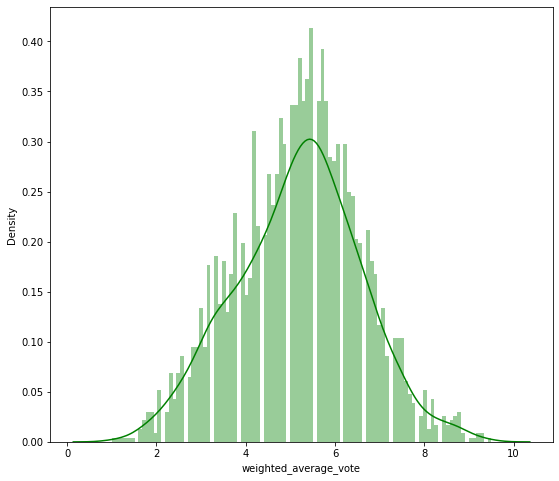

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(movies['weighted_average_vote'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(movies['weighted_average_vote'],color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
print(movies['genre'].describe())

count      2730
unique      285
top       Drama
freq        295
Name: genre, dtype: object


In [ ]:
movies_num = movies.select_dtypes(include = ['float64', 'int64'])
movies_num.head()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,100,4.9,16882,NaN,206.0,74.0,4.9,16882,4.9,5.0,482,252,657,1596,3266,4267,2782,1473,867,1240,4.5,23.0,5.0,2602.0,4.8,6453.0,4.9,2750.0,4.9,10441.0,3.8,14.0,4.9,1946.0,4.8,5378.0,4.8,2291.0,5.1,2230.0,5.9,7.0,5.2,599.0,4.9,971.0,5.2,414.0,4.4,234.0,4.9,3187.0,4.8,6693.0
1,113,6.2,1551,45.0,36.0,23.0,6.2,1551,6.4,6.0,142,64,221,326,380,203,78,30,23,84,6.5,2.0,6.4,187.0,6.1,536.0,6.1,393.0,6.2,835.0,6.5,2.0,6.3,116.0,6.2,386.0,6.1,281.0,6.2,330.0,NaN,NaN,6.6,67.0,6.1,139.0,6.1,102.0,5.2,60.0,6.1,346.0,6.2,618.0
2,118,6.8,8131,NaN,204.0,31.0,6.8,8131,7.1,7.0,885,708,1558,2470,1370,582,214,90,69,185,7.6,10.0,6.9,918.0,6.7,2808.0,6.9,1784.0,6.8,5537.0,8.1,7.0,6.9,811.0,6.7,2595.0,6.9,1618.0,7.1,365.0,7.3,3.0,6.9,56.0,7.0,141.0,7.4,129.0,6.1,91.0,6.9,821.0,6.8,3675.0
3,116,6.7,5449,51.0,163.0,44.0,6.7,5449,7.1,7.0,802,542,953,1242,961,428,189,101,68,163,7.0,1.0,6.5,471.0,6.5,1674.0,7.0,1494.0,6.6,3335.0,NaN,NaN,6.4,367.0,6.4,1425.0,6.9,1265.0,7.2,571.0,7.0,1.0,6.8,86.0,6.9,222.0,7.5,198.0,5.6,87.0,7.1,1132.0,6.4,1866.0
4,107,7.0,37295,39.0,553.0,72.0,7.0,37295,7.2,7.0,4109,3489,8378,11041,5455,2353,1040,536,345,549,6.9,54.0,7.0,6279.0,6.9,13377.0,7.0,5226.0,6.9,21974.0,6.5,28.0,6.9,4608.0,6.9,10971.0,7.0,4206.0,7.2,4767.0,7.7,9.0,7.2,1315.0,7.1,2033.0,7.3,849.0,6.3,172.0,7.0,5506.0,6.9,13868.0


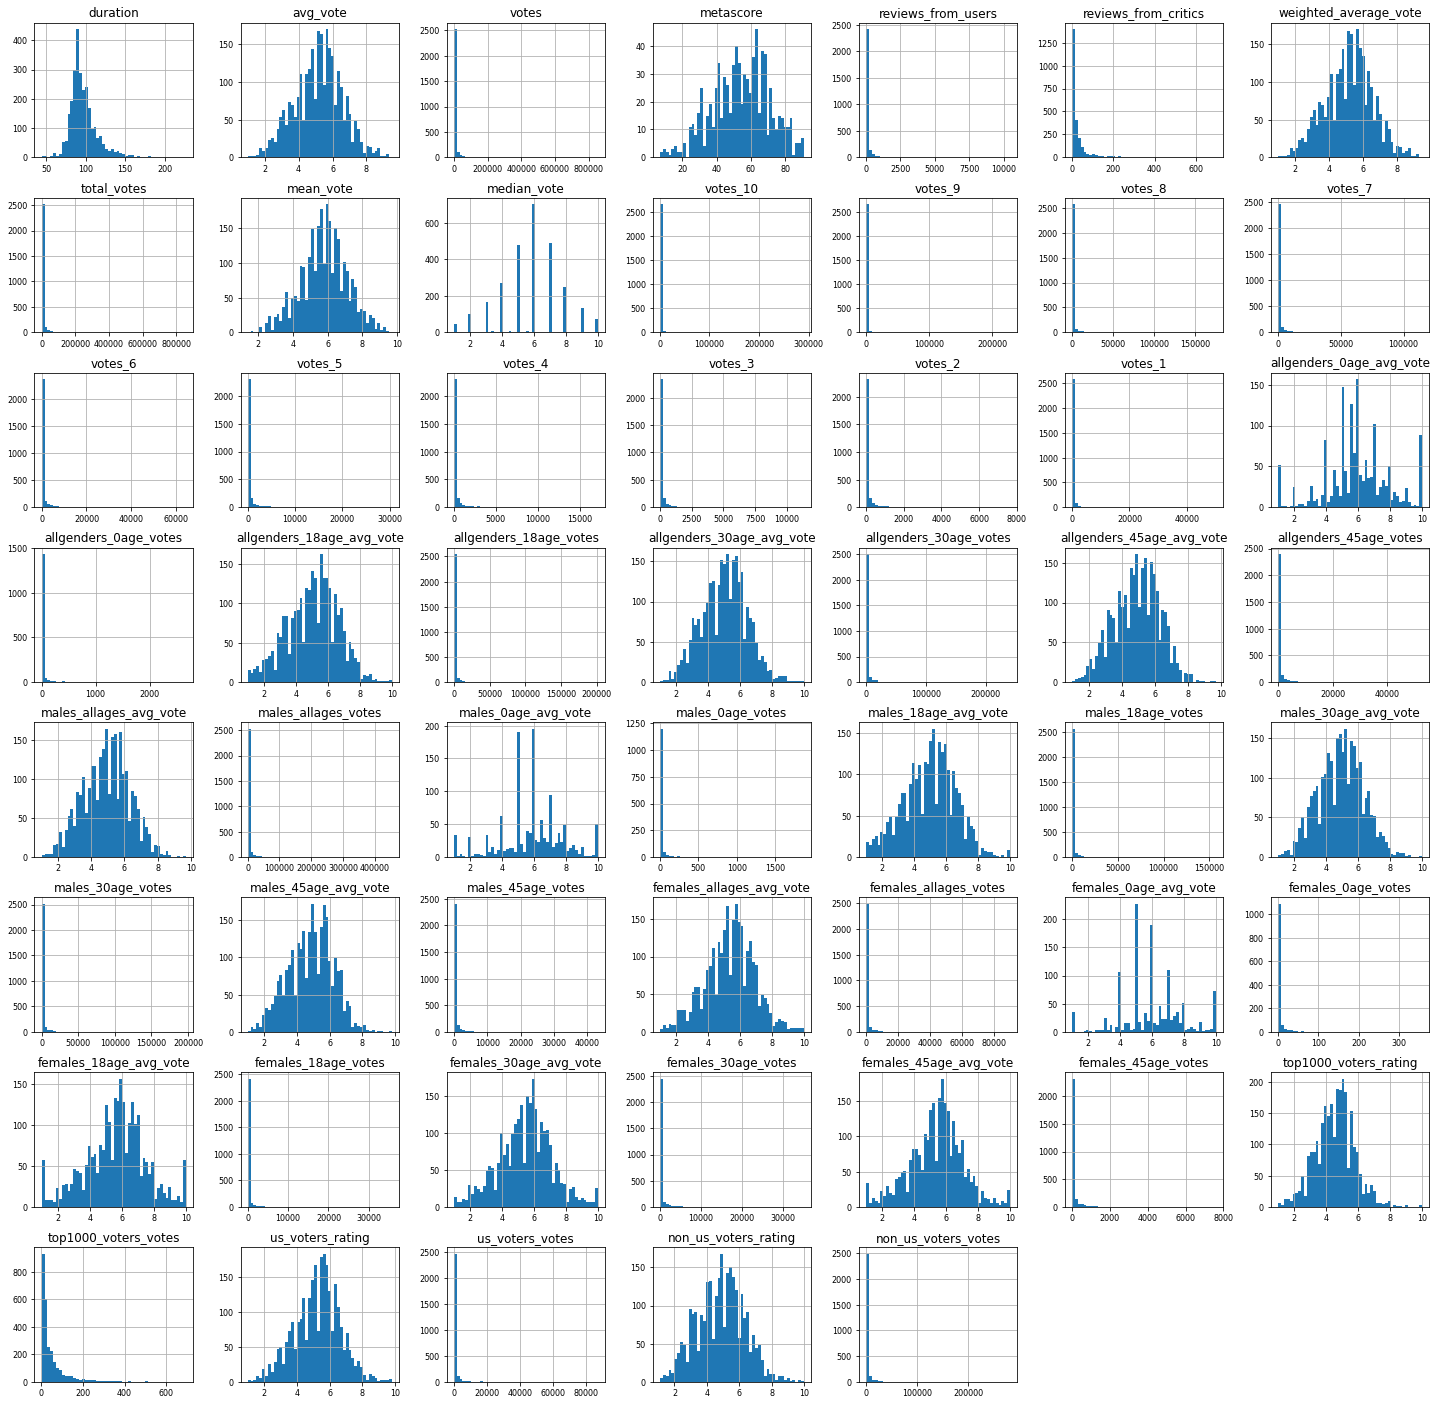

In [ ]:
movies_num.hist(figsize=(25, 25), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

The below correlation metrics says us that the average voters for these movies in the IMDB Websites are  Males and people above the age of 30. Also we can see majority of voters are not from US .


In [ ]:
movies_num_corr = movies_num.corr()['avg_vote'][:-1] # -1 because the latest row is Average Votes
golden_features_list = movies_num_corr[abs(movies_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Average Votes:\n{}".format(len(golden_features_list), golden_features_list))

There is 19 strongly correlated values with Average Votes:
avg_vote                     1.000000
weighted_average_vote        1.000000
non_us_voters_rating         0.923886
allgenders_30age_avg_vote    0.909377
males_allages_avg_vote       0.909002
mean_vote                    0.896702
males_30age_avg_vote         0.894322
us_voters_rating             0.874683
allgenders_18age_avg_vote    0.854658
females_allages_avg_vote     0.839503
allgenders_45age_avg_vote    0.837388
median_vote                  0.833545
males_45age_avg_vote         0.814535
males_18age_avg_vote         0.804677
top1000_voters_rating        0.765752
females_30age_avg_vote       0.726179
females_18age_avg_vote       0.649717
females_45age_avg_vote       0.633950
metascore                    0.603127
Name: avg_vote, dtype: float64


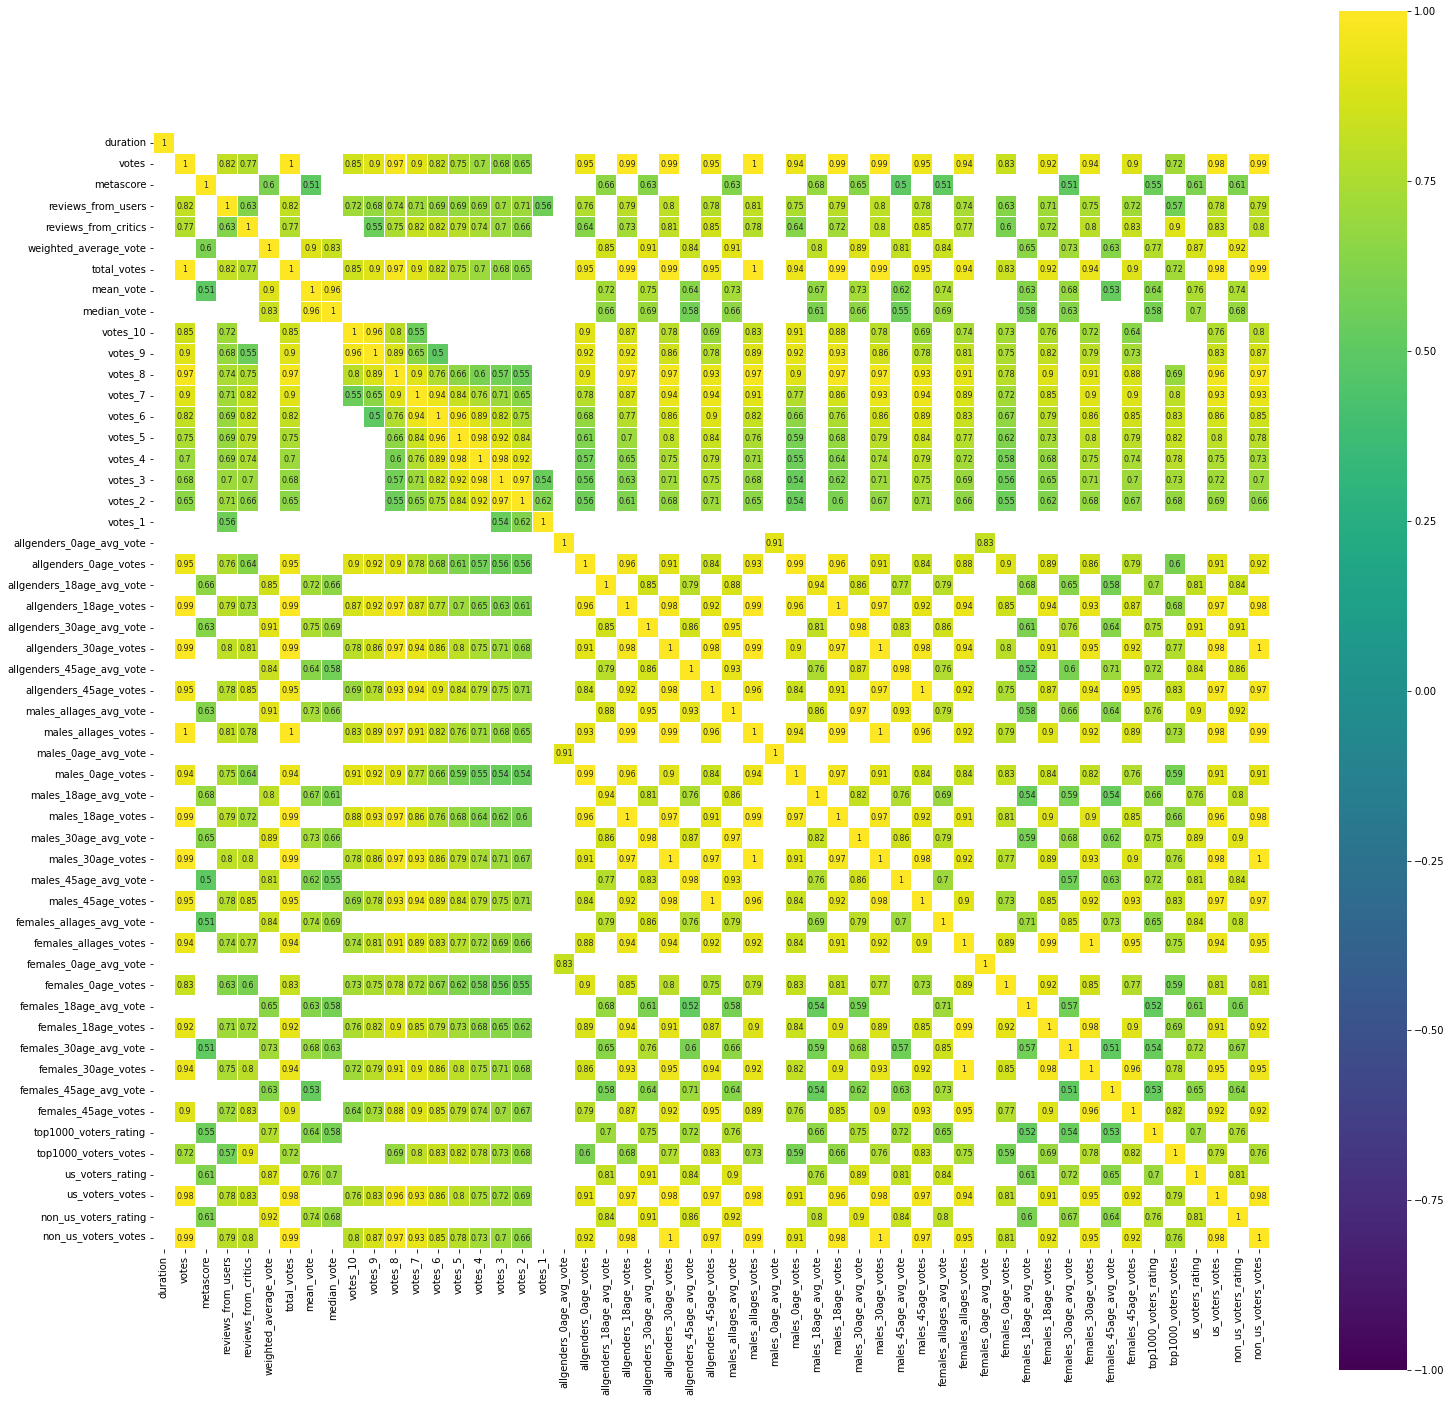

In [ ]:
corr = movies_num.drop(labels='avg_vote',axis=1).corr() # We already examined Avg Vote correlations
plt.figure(figsize=(25, 25))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# **EDA Continued For Categorical Data Of Dataset**

In [ ]:
Counts = movies["genre"].value_counts() .head(10) #Taking top 10 genres with highest counts
Genres = Counts.index
Genres

Index(['Drama', 'Horror', 'Comedy', 'Thriller', 'Comedy  Drama',
       'Horror  Thriller', 'Drama  Romance', 'Comedy  Romance',
       'Comedy  Drama  Romance', 'Comedy  Horror'],
      dtype='object')

([<matplotlib.axis.XTick at 0x7f8f13f089d0>,
 [Text(0, 0, 'Drama'),
  Text(0, 0, 'Horror'),
  Text(0, 0, 'Comedy'),
  Text(0, 0, 'Thriller'),
  Text(0, 0, 'Comedy  Drama'),
  Text(0, 0, 'Horror  Thriller'),
  Text(0, 0, 'Drama  Romance'),
  Text(0, 0, 'Comedy  Romance'),
  Text(0, 0, 'Comedy  Drama  Romance'),
  Text(0, 0, 'Comedy  Horror')])

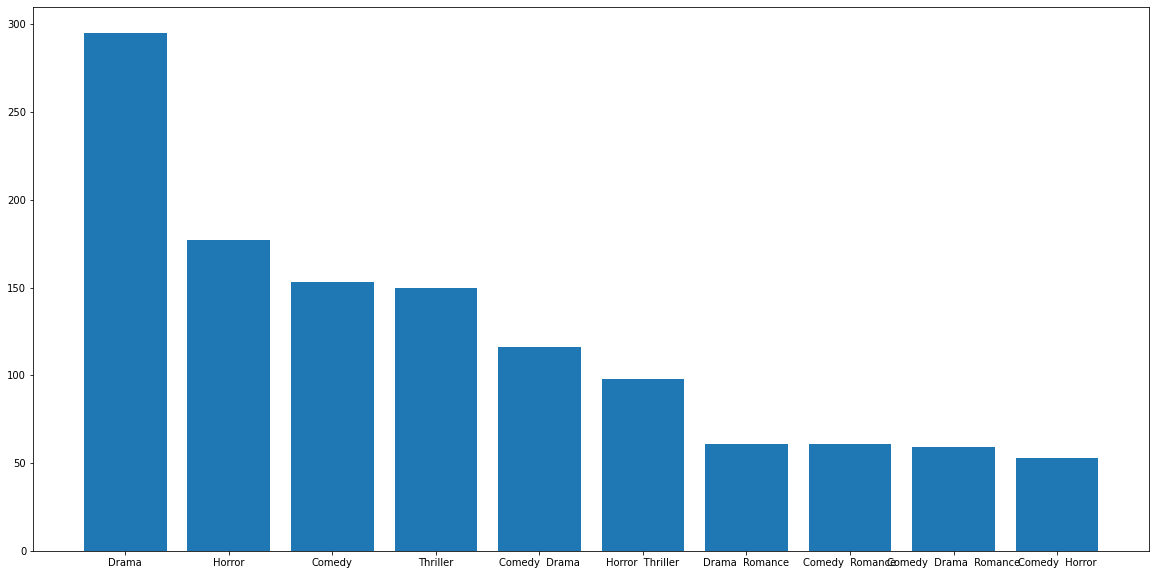

In [ ]:
postionofbars = list(range(len(Genres)))
plt.figure(figsize=(20, 10))
plt.bar(postionofbars,Counts)
plt.xticks(postionofbars,Genres)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'language')

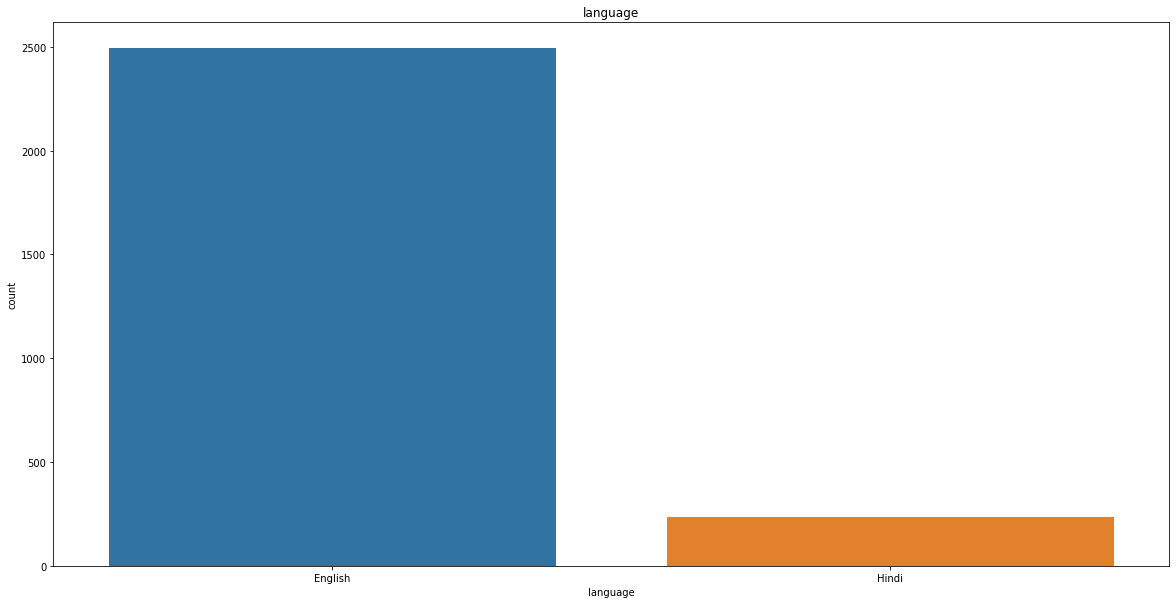

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(movies["language"]).set_title("language")

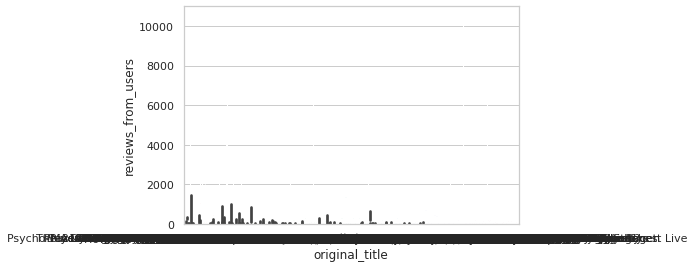

In [ ]:
sns.set_theme(style="whitegrid")
bar_movies = movie
ax = sns.barplot(x="original_title", y="reviews_from_users", data=movies)

# **Text Vectorization: Term Frequency — Inverse Document Frequency (TFIDF)**

Term frequency — Inverse document frequency (TFIDF) is based on the Bag of Words (BoW) model, which contains insights about the less relevant and more relevant words in a document. The importance of a word in the text is of great significance in information retrieval.

**Example** — If you search something on the search engine, with the help of TFIDF values, search engines can give us the most relevant documents related to our search.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(fmovies['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=fmovies.index)
print(tfidf_df.shape)

(2665, 32999)


In [ ]:
tfidf_df.loc[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32994    0.0
32995    0.0
32996    0.0
32997    0.0
32998    0.0
Name: 0, Length: 32999, dtype: float64

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
svd = TruncatedSVD(n_components=2500)
latent_matrix = svd.fit_transform(tfidf_df)


# **See for what dimension range we get atleast 80% of the variance of features**

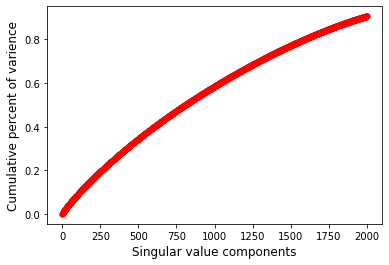

In [ ]:
## for now it is at alomost 0.40 because of time and process related issues but 0.5 variance of the given distribution is recommended
explained  = svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=10,color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cumulative percent of varience', fontsize=12)
plt.show()


In [ ]:
# number of latent dimensions to keep
n = 1000
latent_matrix_l_df = pd.DataFrame(latent_matrix[:,0:n], index=fmovies.imdb_title_id.to_list())


In [ ]:
latent_matrix_l_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
tt0360556,0.116664,-0.008359,0.035136,0.024539,0.084745,0.003756,-0.010378,-0.052509,-0.016814,0.031977,-0.006828,0.009675,-0.056724,-0.019357,-0.027764,-0.002654,0.009046,-0.009345,0.015966,-0.076627,-0.036007,-0.040976,0.025574,-0.068639,-0.039535,-0.029359,0.034223,0.004592,0.048508,-0.023924,-0.023867,0.021577,-0.012691,0.004585,-0.013717,0.013785,-0.004967,-0.026877,-0.023236,-0.044467,...,-0.026425,-0.029357,-0.031179,-0.011141,0.005663,-0.004122,0.022507,-0.016725,0.040803,0.004645,0.018836,0.023216,-0.016871,0.043296,-0.015708,-0.010193,0.003190,0.013443,-0.028548,0.000645,-0.011331,-0.027487,0.010309,-0.020889,0.016622,-0.031450,-0.018030,-0.008229,-0.007899,0.022025,0.031132,0.008181,0.000269,-0.006730,-0.003233,0.036775,0.011373,0.000858,-0.035695,0.063433
tt0427543,0.112430,-0.012616,-0.002020,-0.023988,-0.026804,-0.061421,-0.026083,-0.047606,-0.062371,0.029630,0.039680,-0.046546,-0.045189,-0.036398,-0.022062,0.050564,0.049992,-0.014880,-0.002880,-0.034710,-0.023934,0.003108,0.034687,-0.091086,0.011053,0.077043,0.018267,0.065887,-0.016513,0.033064,0.030669,0.002560,0.037188,-0.027102,0.011127,0.082447,-0.049700,-0.027170,0.050948,-0.040378,...,-0.013337,-0.030878,0.034640,0.019754,-0.007740,0.003163,0.012832,-0.006868,-0.023625,0.029338,-0.006113,0.010488,0.004675,0.006623,-0.009729,0.000457,-0.002374,0.044903,0.013970,-0.016549,-0.004586,0.024374,-0.015722,-0.015321,-0.008575,-0.027859,0.004056,-0.039128,-0.003085,-0.004546,-0.003497,0.005449,0.023003,-0.045143,0.013643,0.021218,0.029882,-0.010438,0.021061,0.015494
tt0441881,0.117595,-0.010045,-0.000460,0.051843,-0.053894,-0.009037,-0.010164,-0.001223,-0.037317,0.105293,0.019755,-0.114073,-0.016016,0.069199,0.024011,-0.010815,0.040684,-0.040985,-0.014532,-0.075838,-0.072566,-0.006877,0.048510,0.030313,0.016338,0.065967,0.049472,0.022375,0.029358,-0.041946,0.037925,0.019238,0.004007,-0.021823,0.030605,-0.023237,0.006951,-0.040436,-0.004059,-0.001084,...,0.009684,0.018449,-0.012991,-0.015117,0.035635,0.003061,-0.014972,-0.026978,-0.007180,-0.014325,-0.008392,0.004053,-0.039354,-0.023998,-0.017541,0.009890,-0.011136,0.024707,0.017458,-0.009251,-0.005022,0.009348,0.014602,0.034801,0.012219,-0.011734,0.019140,0.016607,-0.046574,-0.004650,-0.014145,0.027599,-0.014422,-0.005927,0.017538,-0.019457,0.012517,-0.007146,-0.016716,-0.034540
tt0783640,0.098110,-0.009635,-0.002869,0.002063,-0.000711,-0.003760,-0.046190,-0.005242,-0.004300,0.011432,-0.051717,0.040923,0.011872,0.003200,-0.003544,0.035732,-0.040891,-0.047904,-0.028583,-0.049542,0.018169,0.021475,0.012569,-0.018119,0.006542,0.013103,-0.018775,0.019223,0.047593,0.018186,0.030036,0.071177,0.023099,-0.035886,-0.077792,-0.044110,0.065204,0.019548,0.002714,-0.064132,...,0.001878,-0.011411,0.003318,0.013516,-0.023052,0.011274,-0.024497,-0.005121,-0.009955,-0.009650,-0.006732,-0.021040,0.007140,-0.002278,-0.023758,-0.003810,0.006532,-0.002969,-0.021222,0.005411,0.018403,-0.003979,-0.036358,-0.006796,-0.004202,0.003737,-0.018553,0.002705,0.016696,-0.002549,0.002625,0.021698,-0.007025,-0.008871,0.013137,-0.002425,0.004929,-0.001071,0.017000,0.030896
tt0800325,0.095052,0.008251,-0.015421,0.019576,-0.007779,0.000279,0.015836,-0.016852,0.032239,-0.016641,-0.031159,-0.048387,-0.033169,-0.019449,-0.005801,0.019177,-0.000448,-0.010281,-0.043585,0.014565,0.020800,-0.025102,-0.042754,-0.013994,0.019342,-0.013023,-0.020802,0.016013,-0.052766,-0.000588,0.032724,-0.079832,-0.032250,0.025941,-0.039258,0.017040,0.013461,0.017607,0.008024,-0.045626,...,0.027147,0.017867,0.009946,0.008656,-0.022099,0.014850,-0.027574,0.006244,-0.017191,-0.005828,0.004131,0.004317,0.038299,-0.003060,-0.005136,-0.015089,0.005146,0.021816,0.026565,-0.008892,0.003618,0.001630,0.005204,0.018

In [ ]:
latent_matrix_l_df.shape

(2665, 1000)

In [ ]:
frating.head()

,imdb_title_id,title,allgenders_18age_avg_vote
0,tt0360556,Fahrenheit 451,5.0
1,tt0427543,A Million Little Pieces,6.4
2,tt0441881,La battaglia di Long Tan,6.9
3,tt0783640,Era mio figlio,6.5
4,tt0800325,The Dirt,7.0


In [ ]:
ratings_f2 = pd.pivot_table(frating,values="allgenders_18age_avg_vote",index=frating.index,columns="imdb_title_id").fillna(0)
ratings_f2.head(5)

imdb_title_id,tt0360556,tt0427543,tt0441881,tt0783640,tt0800325,tt0810836,tt0837563,tt0858419,tt0859635,tt0926132,tt0972544,tt0983946,tt10003008,tt10006006,tt10008784,tt10009030,tt10009434,tt10012964,tt10017956,tt10022384,tt10023024,tt10048556,tt10049848,tt10051586,tt10059518,tt10060094,tt10062614,tt10081596,tt10085338,tt10086834,tt10091530,tt10091696,tt10101774,tt10108544,tt10110872,tt10126136,tt10126434,tt10140002,tt10149868,tt10151054,...,tt9652730,tt9652782,tt9659470,tt9664078,tt9670282,tt9671918,tt9680136,tt9680166,tt9685652,tt9686708,tt9702698,tt9735758,tt9738400,tt9749144,tt9766280,tt9766310,tt9779516,tt9782756,tt9783778,tt9784456,tt9794630,tt9810420,tt9812258,tt9815084,tt9815714,tt9815998,tt9817760,tt9820352,tt9831136,tt9840958,tt9844368,tt9855990,tt9860728,tt9860860,tt9866208,tt9883996,tt9887580,tt9894470,tt9896916,tt9898858
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_f2.shape

(2730, 2730)

In [ ]:
len(frating.imdb_title_id.unique())

2730

# **Reducing the dimenions of the collaborative matrix using SVD**

Matrix decomposition, also known as matrix factorization, involves describing a given matrix using its constituent elements.

Perhaps the most known and widely used matrix decomposition method is the Singular-Value Decomposition, or SVD. All matrices have an SVD, which makes it more stable than other methods, such as the eigendecomposition. As such, it is often used in a wide array of applications including compressing, denoising, and data reduction.

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
svd = TruncatedSVD(n_components=2500)
latent_matrix_2 = svd.fit_transform(ratings_f2)


In [ ]:
n = 1000
latent_matrix_2_df = pd.DataFrame(latent_matrix_2[:,0:n], index=ratings_f2.columns)

# **See for what dimension range we get atleat 80% of the variance of features**

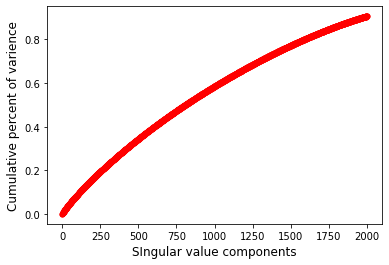

In [ ]:
## for now it is at alomost 0.30 because of time and process related issues but 0.5 variance of the given distribution is recommended
explained  = svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=10,color='red')
plt.xlabel('SIngular value components', fontsize=12)
plt.ylabel('Cumulative percent of varience', fontsize=12)
plt.show()

In [ ]:
latent_matrix_2_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
imdb_title_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0360556,-8.347369e-07,-5.978139e-07,-6.037066e-07,-3.778379e-07,-3.794361e-06,-7.282547e-07,-2.475714e-06,-1.180500e-06,6.243699e-06,-4.356466e-07,1.562542e-07,-3.352713e-06,4.376178e-06,6.171901e-06,5.180115e-06,6.684551e-06,2.139524e-06,6.217962e-07,-2.389818e-07,1.015338e-05,-5.766132e-06,5.429251e-06,-2.839366e-06,-2.938414e-06,8.760773e-06,5.468290e-06,-6.168791e-06,-8.647127e-06,5.599499e-06,2.984532e-06,-1.913811e-06,2.005656e-06,-3.531435e-06,1.067109e-05,-9.942158e-07,-1.964838e-06,-0.000025,-5.889231e-06,-1.696863e-06,0.000015,...,0.000265,0.001469,0.000858,0.001078,-0.000566,-0.001111,-0.000258,-0.000700,-0.000656,0.000352,0.000212,-0.000469,-0.001203,3.430143e-04,0.001715,0.002380,-0.001255,-0.000595,-0.000351,-0.003098,-0.001120,0.000826,-0.001032,0.000037,-0.000524,0.002304,0.001143,-0.000994,0.000702,0.000774,-0.000931,0.000759,0.000039,-0.002735,-0.001324,0.000257,0.001526,0.002348,-0.001510,-0.001596
tt0427543,1.916935e-07,-1.457153e-07,-1.572888e-07,-3.036614e-07,-3.308555e-07,-3.648390e-07,-3.300078e-07,1.181356e-07,2.226728e-07,3.660174e-07,-2.560256e-07,-5.999026e-07,-5.136947e-07,-2.952211e-07,2.793476e-07,8.169765e-07,7.915155e-07,-1.134415e-07,-2.545263e-07,1.306498e-06,-9.365059e-07,2.251139e-06,1.586834e-08,-1.108725e-06,-9.718600e-07,1.529413e-06,-4.762192e-07,-1.053748e-06,2.769016e-06,-7.092961e-07,-2.581034e-06,-3.494526e-06,9.766633e-07,-1.778533e-06,-2.262640e-06,-3.138643e-06,-0.000003,2.098589e-06,-2.421140e-07,-0.000002,...,0.000004,-0.000110,-0.000077,0.000048,-0.000017,-0.000192,0.000037,0.000023,-0.000085,-0.000007,0.000047,-0.000109,0.000229,9.296284e-05,-0.000071,0.000090,-0.000124,-0.000182,0.000065,0.000048,-0.000011,-0.000109,0.000104,-0.000018,-0.000126,0.000241,-0.000289,0.000235,-0.000113,0.000210,-0.000070,0.000121,0.000322,0.000158,-0.000321,-0.000156,0.000049,-0.000199,0.000230,0.000676
tt0441881,-2.267157e-08,4.218866e-08,-2.599656e-08,-1.264099e-07,-2.865876e-07,-2.568206e-07,6.914536e-08,-4.655892e-07,9.328119e-07,-2.671965e-07,-2.536594e-07,-8.527730e-07,1.147123e-07,7.716956e-07,1.530334e-07,3.934864e-07,1.224071e-06,-6.133838e-07,-1.354823e-07,-1.769984e-07,-7.695760e-07,-3.675555e-07,6.806256e-07,-1.712440e-06,8.425131e-07,1.085083e-06,-7.900090e-07,-8.658508e-07,8.592969e-07,5.984217e-07,-1.013428e-07,4.170680e-07,-7.668766e-07,7.924964e-07,6.724720e-07,-1.338419e-08,0.000001,1.939644e-06,-1.588879e-06,-0.000001,...,-0.000006,-0.000023,-0.000006,-0.000020,0.000029,-0.000029,0.000013,0.000003,0.000018,0.000018,-0.000003,-0.000032,-0.000020,3.140687e-05,-0.000012,-0.000020,-0.000010,-0.000015,0.000041,-0.000044,-0.000039,-0.000037,-0.000022,0.000024,-0.000031,-0.000032,0.000042,-0.000027,-0.000018,0.000023,0.000054,0.000019,0.000011,0.000007,-0.000018,0.000083,0.000090,0.000021,0.000035,0.000071
tt0783640,9.042609e-08,-5.603528e-08,-3.589138e-07,-3.535422e-09,7.404868e-08,-3.566818e-07,4.933813e-08,2.453199e-07,8.982244e-08,2.709170e-07,6.127327e-07,-8.959631e-08,-3.992071e-07,1.129576e-07,2.385500e-08,-5.019644e-07,-1.768084e-08,-6.213203e-09,-5.751019e-07,-7.073416e-08,-7.471472e-08,1.279042e-06,1.279713e-06,6.207735e-07,1.594608e-06,-3.182658e-07,3.553426e-07,-1.605065e-06,-5.541255e-07,-6.176749e-07,-5.275499e-07,-1.190386e-06,-2.522393e-06,1.783793e-06,-7.111360e-07,1.425967e-07,0.000001,6.790956e-07,-1.536932e-06,-0.000001,...,0.000047,0.000002,0.000048,0.000026,-0.000028,0.000065,-0.000096,-0.000089,0.000092,0.000092,-0.000019,-0.000013,0.000035,-8.655026e-07,-0.000006,-0.000008,-0.000051,0.000048,-0.000016,0.000054,-0.000013,-0.000037,-0.000028,0.000002,-0.000190,0.000003,-0.000140,-0.000097,-0.00006

In [ ]:

latent_matrix_2_df = latent_matrix_2_df[:2665]

In [ ]:
latent_matrix_2_df.shape

(2665, 1000)

In [ ]:
latent_matrix_l_df.shape

(2665, 1000)

In [ ]:


final_mov = latent_matrix_l_df.merge(fmovies,on=fmovies.index)
print(final_mov.title.head(10))

0              Fahrenheit 451
1     A Million Little Pieces
2    La battaglia di Long Tan
3              Era mio figlio
4                    The Dirt
5                  Dirt Music
6                Pet Sematary
7                      Bolden
8            Super Troopers 2
9                 Road to Red
Name: title, dtype: object


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
mov_title = "Sonu Ke Titu Ki Sweety";
mov_id = fmovies[fmovies["title"] == mov_title]["imdb_title_id"]



a_1 = np.array(latent_matrix_l_df.loc[mov_id]).reshape(1,-1)
a_2 = np.array(latent_matrix_2_df.loc[mov_id]).reshape(1,-1)      

score_1 = cosine_similarity(latent_matrix_l_df,a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df,a_2).reshape(-1)

hybrid = ((score_1 + score_2)/2.0);

dictDF = {"content":score_1, "collaborative":score_2, "hybrid": hybrid}
similar = pd.DataFrame(dictDF, index = latent_matrix_l_df.index)
similar.sort_values("hybrid",ascending=False,inplace=True)
pred_ids = similar[1:].head(11).index
print(pred_ids)
for i in pred_ids:
  print(fmovies[fmovies["imdb_title_id"]== i]["title"])
 

Index(['tt7631320', 'tt8647400', 'tt8108164', 'tt9817760', 'tt9248940',
       'tt9390222', 'tt3734580', 'tt6988116', 'tt7624840', 'tt5668770',
       'tt7886848'],
      dtype='object')
1901    Aura
Name: title, dtype: object
2365    De De Pyaar De
Name: title, dtype: object
2107    Ek Ladki Ko Dekha Toh Aisa Laga
Name: title, dtype: object
2716    Jai Mummy Di
Name: title, dtype: object
2592    Dream Girl
Name: title, dtype: object
2640    72 Hours: Martyr Who Never Died
Name: title, dtype: object
498    Ghoomketu
Name: title, dtype: object
1555    Kalank
Name: title, dtype: object
1898    Paharganj
Name: title, dtype: object
939    Mardaani 2
Name: title, dtype: object
2000    Sadak 2
Name: title, dtype: object


In [ ]:
#### START WORKING FROM HERE ####
import matplotlib.pyplot as plt


# plt.scatter(,score_1)
# plt.show()

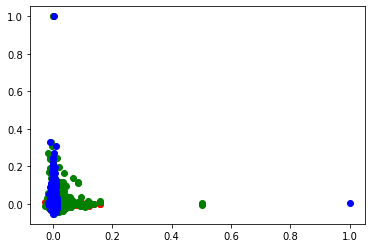

In [ ]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(similar)

colours= {}
colours[0] = 'r'
colours[1] = 'g'
plt.scatter(similar["hybrid"],score_2,color='r')
plt.scatter(similar["hybrid"],score_1,color='g')
plt.scatter(score_2,score_1,color='b')
plt.show()


In [ ]:
import pickle

In [ ]:
new.to_dict()

{'movie_id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78:

In [ ]:
pickle.dump(new.to_dict(),open('movie_list_dict.pkl','wb'))


In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))